In [35]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import sys

sys.path.insert(0, os.path.realpath(os.path.join(os.getcwd(), "..")))
import getdist
import IPython
import matplotlib
import matplotlib.pyplot as plt
from getdist import MCSamples, plots

print("GetDist Version: %s, Matplotlib version: %s" % (getdist.__version__, matplotlib.__version__))

GetDist Version: 1.7.4, Matplotlib version: 3.10.0


In [36]:
import pandas as pd
from getdist import MCSamples, plots
import numpy as np

In [55]:
# --- LOAD TURING DATA ---
# Read the CSVs exported from Julia
lcdm = pd.read_csv("lcdm_chains.csv")
gp = pd.read_csv("gp_chains.csv")


# # Convert to numpy arrays
samps_lcdm = np.array(lcdm["omegam_pr"]).reshape(-1, 1)
samps_gp = np.array(gp["omegam_po"]).reshape(-1, 1)

# --- CREATE GETDIST OBJECTS ---
names = ["om1"]
labels = [r"\Omega_m"]

samples1 = MCSamples(samples=samps_lcdm, names=names, labels=labels, label="LCDM")
samples2 = MCSamples(samples=samps_gp, names=names, labels=labels, label="GP")


Removed no burn in
Removed no burn in


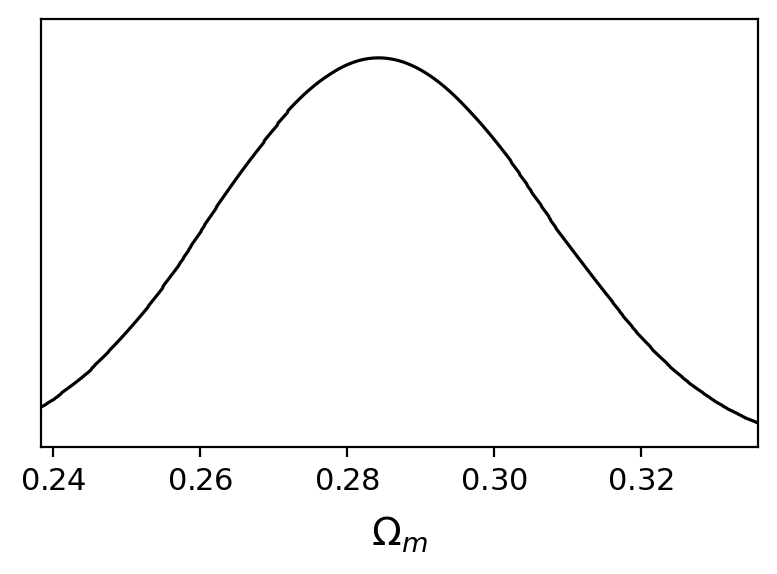

In [56]:
# 1D marginalized plot
g = plots.get_single_plotter(width_inch=4)
g.plot_1d(samples1, "om1")
g.fig

In [58]:
# 1D marginalized comparison plot
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([samples1, samples2], "om1")
g.add_legend(["LCDM", "GP"], legend_loc='best')
g.fig

Exception: parameter name not found: om1

In [59]:
hzdf = pd.read_csv("hz_data.csv")
hz_data = hzdf["data"]
hz_z = hzdf["z"]
hz_error = hzdf["err"]
z_integ = pd.read_csv("zinteg1.csv")

In [62]:
# 1. Define the specific columns you want to include in the subset
# This creates a list: ['model[1]', 'model[2]', ..., 'model[20]']
target_cols1 = [f'hz_model[{i}]' for i in range(1, 301)]
target_cols2 = [f'hdata[{i}]' for i in range(1, 21)]

# 2. Extract the subset and calculate statistics
lcdm_df = lcdm[target_cols1]
gp_df = gp[target_cols2]

mean_vals_lcdm = lcdm_df.mean()
std_vals_lcdm = lcdm_df.std()

mean_vals_gp = gp_df.mean()
std_vals_gp = gp_df.std()

# 3. Create the plot
z = z_integ["z_integ"]  # X-axis representing the models 1 to 20
plt.figure(figsize=(10, 6))

#hz_data
plt.errorbar(hz_z, hz_data, yerr=hz_error, fmt='.', color='black', capsize=2, label='H(z) fake data')

# Plot LCDM
plt.plot(z, mean_vals_lcdm, color='darkblue', label='LCDM mean', linewidth=2)
plt.fill_between(z, mean_vals_lcdm - std_vals_lcdm, mean_vals_lcdm + std_vals_lcdm, color='blue', alpha=0.3, label='LCDM standard dev.')

#Plot GP
plt.plot(z, mean_vals_gp, color='darkorange', label='GP mean', linewidth=2)
plt.fill_between(z, mean_vals_gp - std_vals_gp, mean_vals_gp + std_vals_gp, color='orange', alpha=0.3, label='GP standard dev.')

# Formatting
plt.title('Comparison of LCDM and GP constraints on H(z)')
plt.xlabel(r'$z$')
plt.ylabel(r'$H(z) \ [\mathrm{km \ s^{-1} \ Mpc^{-1}}]$')
# plt.xticks(z)
plt.legend()
# plt.grid(True, linestyle=':', alpha=0.7)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (300,) and (20,)